In [21]:
!pip install -q transformers

In [22]:
!pip install -q youtube_transcript_api

In [23]:
from transformers import pipeline

In [24]:
from youtube_transcript_api import YouTubeTranscriptApi   

In [25]:
youtube_video = "https://www.youtube.com/watch?v=BVgnIYSKUjY"

In [26]:
v_id=youtube_video.split("=")[1]

In [27]:
v_id

'BVgnIYSKUjY'

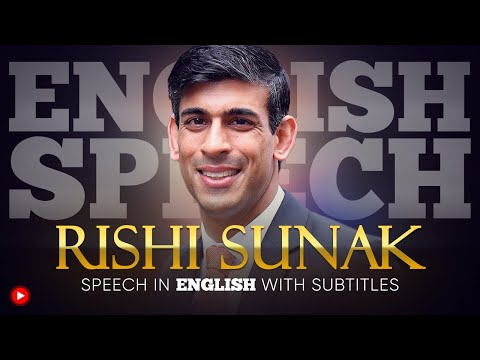

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo(v_id)

In [29]:
YouTubeTranscriptApi.get_transcript(v_id)
transcript = YouTubeTranscriptApi.get_transcript(v_id)

In [30]:
transcript[0:5]

[{'text': 'I will unite our country', 'start': 0.0, 'duration': 5.7},
 {'text': 'not with words', 'start': 3.84, 'duration': 3.9},
 {'text': 'but with action', 'start': 5.7, 'duration': 6.54},
 {'text': 'I will work day in and day out to',
  'start': 7.74,
  'duration': 7.38},
 {'text': 'deliver for you', 'start': 12.24, 'duration': 4.68}]

In [31]:
r = ""
for i in transcript:
    r += ' ' + i['text']
print(r)
print(len(r))

 I will unite our country not with words but with action I will work day in and day out to deliver for you this government will have integrity professionalism an accountability at every level trust is earned and I will earn yours good morning I've just been to Buckingham Palace and accepted his majesty the king's invitation to form a government in his name it is only right to explain why I'm standing here as your new prime minister right now our country is facing a profound economic crisis the aftermath of covid still lingers Putin's war in Ukraine has destabilized energy markets and Supply chains the world over I want to pay tribute to my predecessor Liz Truss she was not wrong to want to improve growth in this country it is a noble aim and I admired her restlessness to create change but some mistakes were made not born of ill will or bad intentions quite the opposite in fact mistakes nonetheless and I have been elected as leader of my party and your prime minister in part to fix them

In [32]:
summary = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [33]:
num = int(len(r)/1000)
summarize = []
for i in range(0, num + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + r[start:end])
  out = summary(r[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarize.append(out)

print(summarize)

input text 
 I will unite our country not with words but with action I will work day in and day out to deliver for you this government will have integrity professionalism an accountability at every level trust is earned and I will earn yours good morning I've just been to Buckingham Palace and accepted his majesty the king's invitation to form a government in his name it is only right to explain why I'm standing here as your new prime minister right now our country is facing a profound economic crisis the aftermath of covid still lingers Putin's war in Ukraine has destabilized energy markets and Supply chains the world over I want to pay tribute to my predecessor Liz Truss she was not wrong to want to improve growth in this country it is a noble aim and I admired her restlessness to create change but some mistakes were made not born of ill will or bad intentions quite the opposite in fact mistakes nonetheless and I have been elected as leader of my party and your prime minister in part

Your max_length is set to 142, but you input_length is only 98. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


Summarized text
 2019 is not the sole property of any one individual it is a mandate that belongs to and unites all of us . I fully appreciate how hard things are and I understand too that I have work to do to restore trust after all that has happened . I will deliver on its promise a stronger NHS better schools safer streets and control of our borders .
input text 
nd here before you ready to lead our country into the future to put your needs above politics to reach out and build a government that represents the very best traditions of my party together we can achieve incredible things we will create a future worthy of the sacrifices so many have made and Phil tomorrow and every day thereafter with hope thank you [Music] foreign [Music] [Music] [Applause] thank you [Music] [Music] [Music] thank you [Music]
Summarized text
 Thank you Phil tomorrow and every day thereafter with hope thank you . [Applause] thank you [Music] [Apprause] Thank you . Thank you for your support and your suppo

In [34]:
len(str(summarize))

1342

In [35]:
str(summarize)

'[\' I will unite our country not with words but with action I will work day in and day out to deliver for you this government will have integrity professionalism an accountability at every level . I want to pay tribute to my predecessor Liz Truss she was not wrong to want to improve growth in this country it is a noble aim and I admired her restlessness to create change .\', " I will place economic stability and confidence at the heart of this government\'s agenda this will mean difficult decisions to come for you . I will always be grateful to Boris Johnson for his incredible achievements as prime minister and I treasure his warmth and generosity of spirit . I know he would agree that the Mandate my party earned i.", \' 2019 is not the sole property of any one individual it is a mandate that belongs to and unites all of us . I fully appreciate how hard things are and I understand too that I have work to do to restore trust after all that has happened . I will deliver on its promise a